# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test data
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/LinearRegression/used_device_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Shape of data
data.shape

(3454, 15)

**Observation:**
There are 3454 rows & 15 columns

In [ ]:
#Info on datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observation:**
 There are 9 columns of Float datatype, 2 of Integer Datatype & 4 of Object datatype.



In [ ]:
#Top 10 entries in dataset
data.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [ ]:
#Statistical Summary
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


**Observation:**

1) The mean screen size is 13.7cm and almost 50% of the devices are within 12.8 cm screen size.

2) 75% of the devices have the main camera mp within 13 megapixels & 75% of the devices have the selfie camera mp within 8 megapixels.

3) 75% of the devices have their internal memory below 64GB & RAM as 4GB.

4) 50% of the devices have a battery below 3000mAh & 50% of the devices weigh within 160gms.

5)50% of the device models were released before Y2015.

6) 50% of the devices were used for almost 690 days.

7) 75% of the devices have the normalized new price at 5.67 while 75% of the devices have the normalized used price at 4.76.



In [ ]:
#Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observation:**
There are missing values in the dataset.

1) 179 values missing in main_camera_mp column

2) 2 values missing in selfie_camera_mp column

3) 4 values missing in ram & int_memory column

4) 6 values missing in battery column

5) 7 values missing in weight column

In [ ]:
#Checking for duplicated rows
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# Making a copy of the dataset
df=data.copy()

## **Univariate Analysis**

In [ ]:
# Defining a function to plot  histogram & boxplot with the mean & median
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Defining the function for creating a labelled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observation on Screen Size**

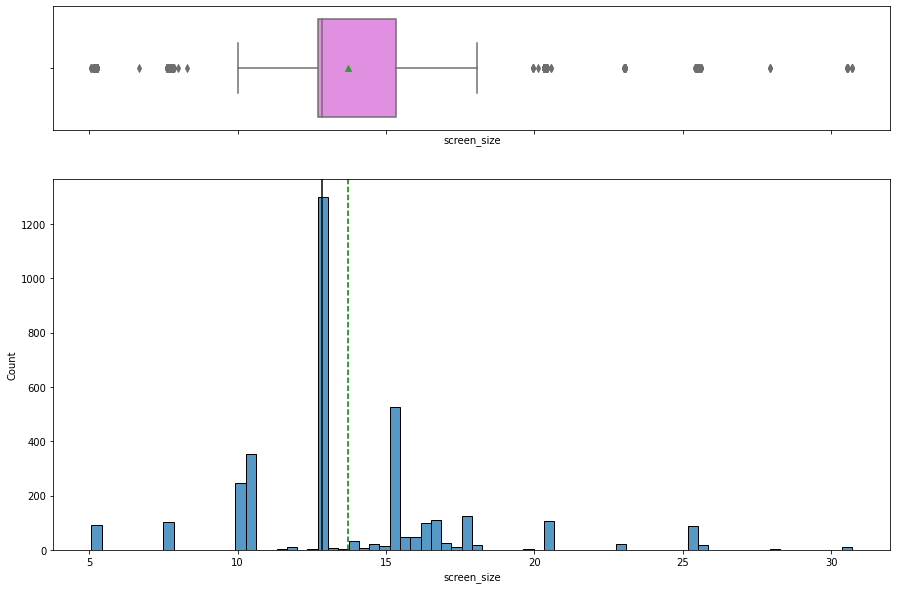

In [ ]:
histogram_boxplot(df,'screen_size')

**Observations**:

1) The data is right skewed with the mean being greater than the median.

2) There are outliers present.

3) The average screen size is around 13.5 cm.

**Observation on Main Camera**

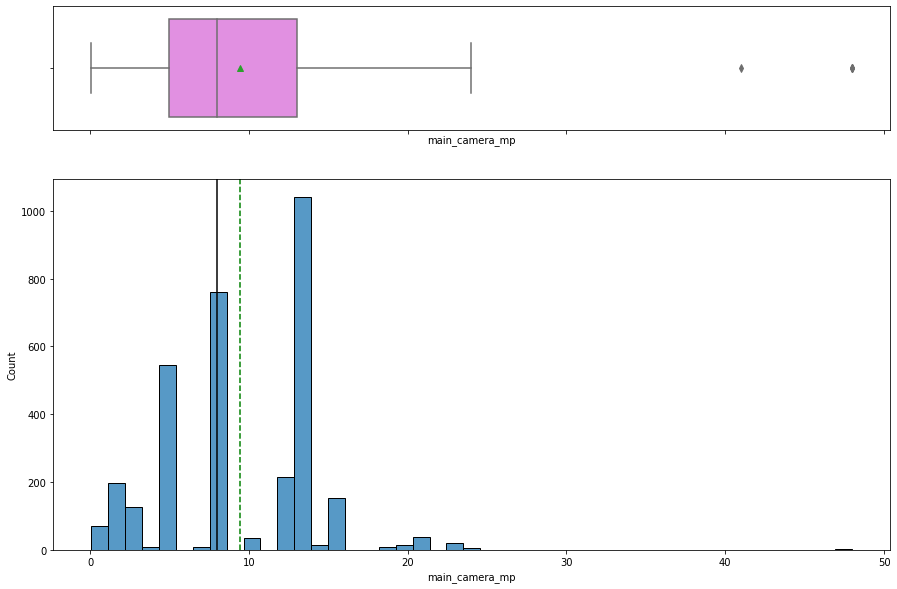

In [ ]:
histogram_boxplot(df,'main_camera_mp')

**Observations:**

1) The data is right skewed with a thin tail.

2) The maximum main camera mp is 48.

**Observation on Battery**

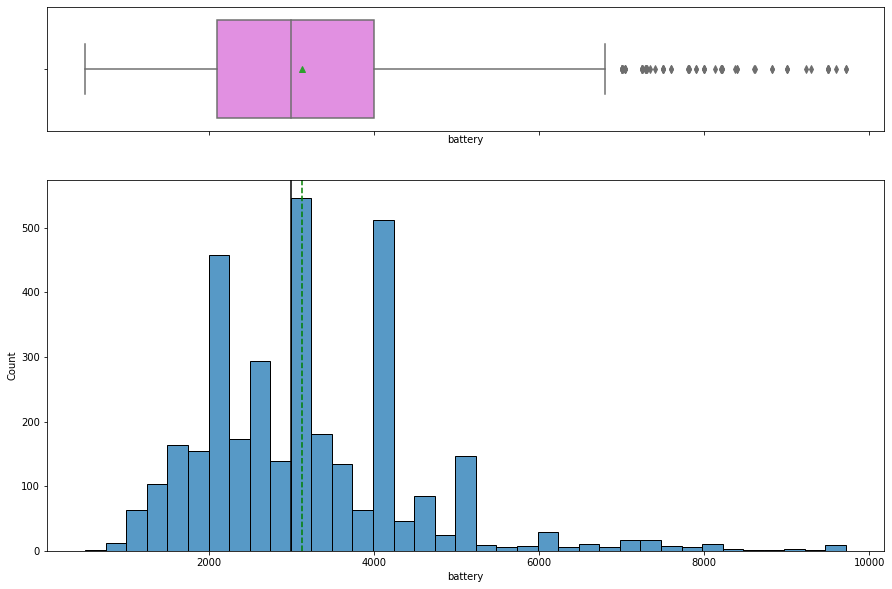

In [ ]:
histogram_boxplot(df,'battery')

**Observations:**

1) The data has a long right tail with a slight skewness.

2) The average battery size is around 3000mAH with the maximum battery size being 9720 mAH.

**Observation on Selfie Camera**

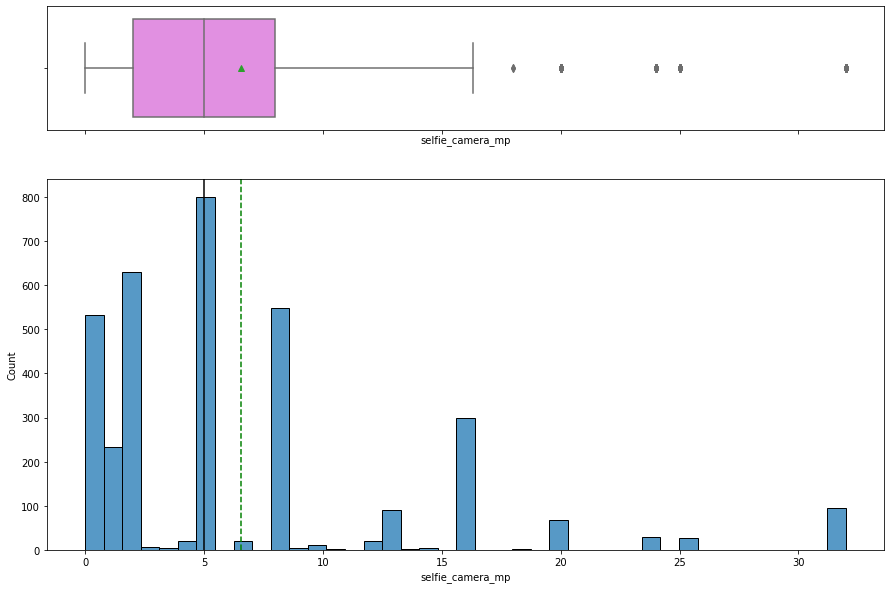

In [ ]:
histogram_boxplot(df,'selfie_camera_mp')

**Observations:**

1) The data is right skewed.

2) The averge selfie camera mp is around 6 & the maximum is 32mp.

**Observations on Internal Memory**

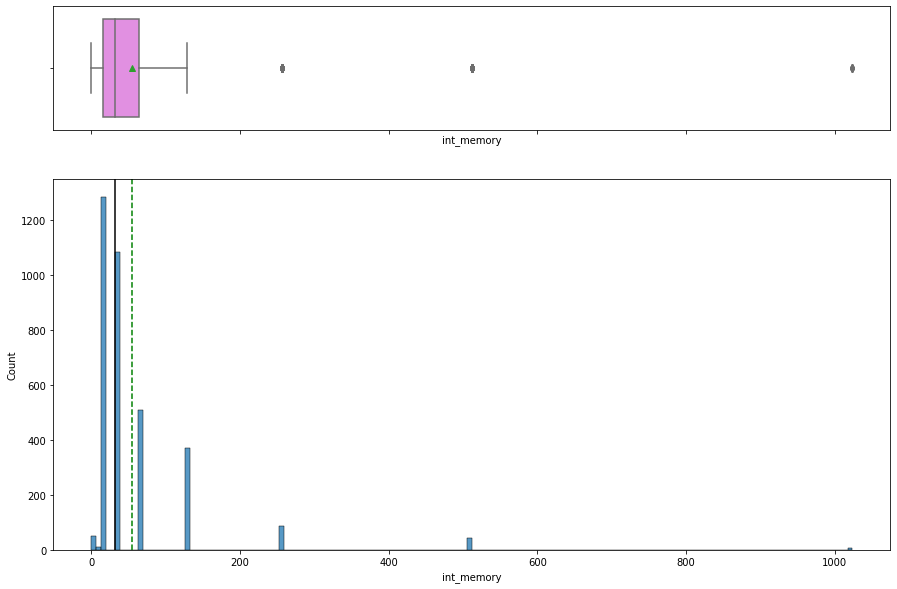

In [ ]:
histogram_boxplot(df,'int_memory')

**Observations:**

1) The data is right skewed with the median internal memory being 32GB.

**Observation on RAM**

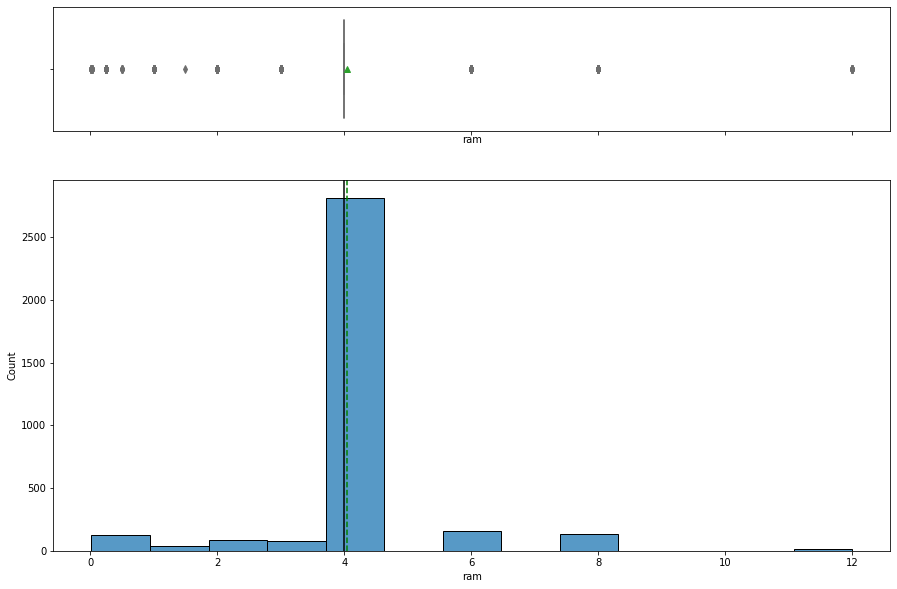

In [ ]:
histogram_boxplot(df,'ram')

**Observations:**

1) Here the median , 25% & 75% ,minimum & maximum of the RAM for the mobiles & Tablets  is all the same (4GB).

**Observation on Days Used**

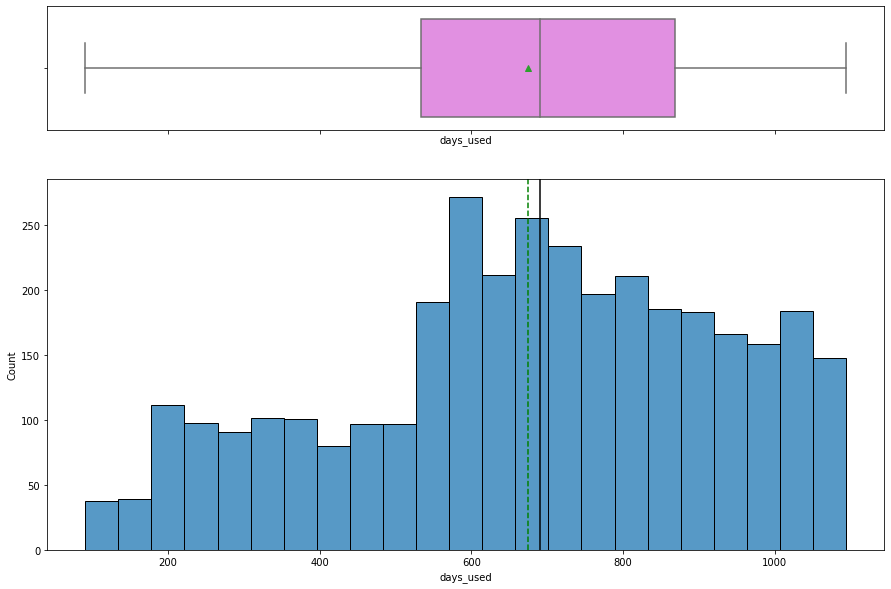

In [ ]:
histogram_boxplot(df,'days_used')

**Observations:**

1) The data is slightly left skewed with the average number of days a device used is around 730 days.

**Observations on Weight**

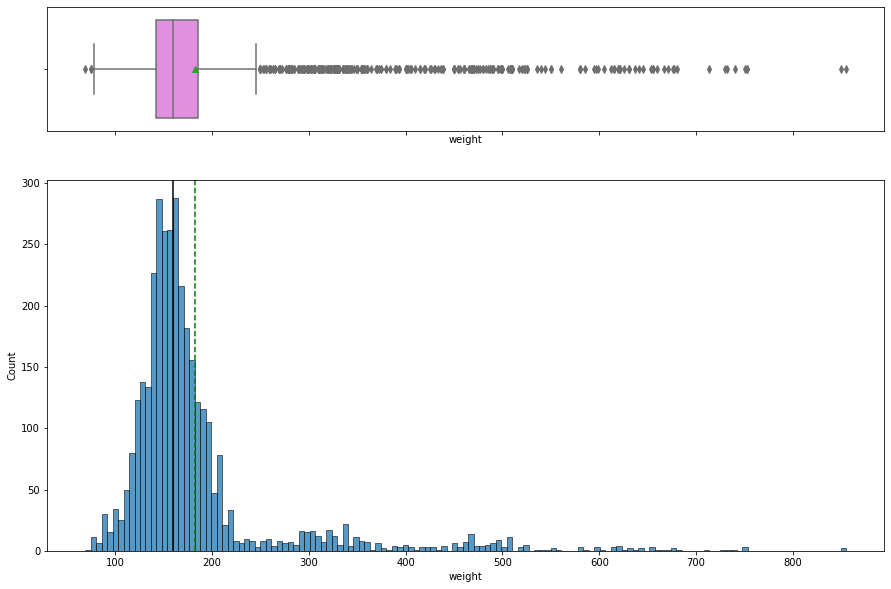

In [ ]:
histogram_boxplot(df,'weight')

**Observations:**

The data is almost noramlly distributed with a lot of outliers beyond the maximum & only around 2 below the minimum.


**Observations on Normalized Used Price**

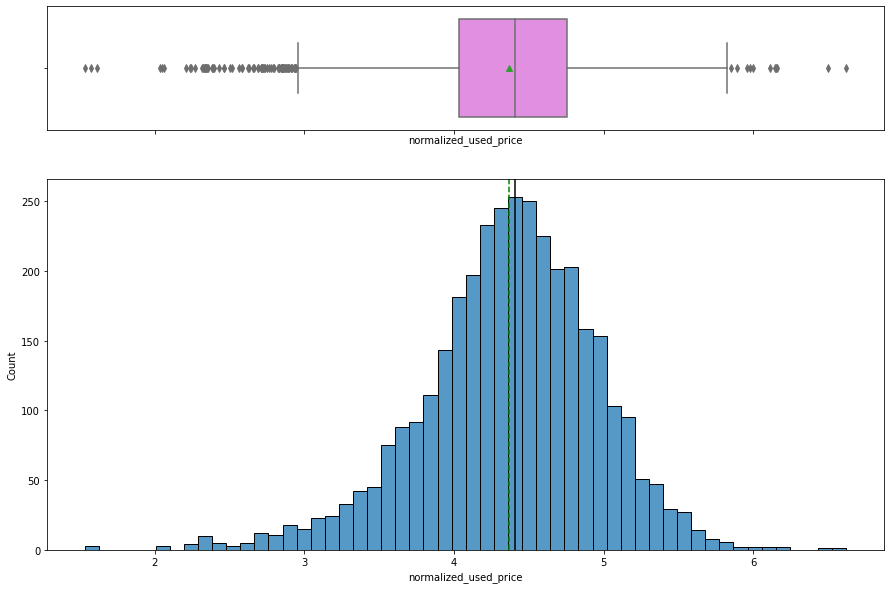

In [ ]:
histogram_boxplot(df,'normalized_used_price')

**Observations:**

1)The data is uniformly distributed with outliers present beyond the maximum value & below the minimum value.

2) The average normalized used price is around 4.4 Euros.

**Observations on Normalized New price**

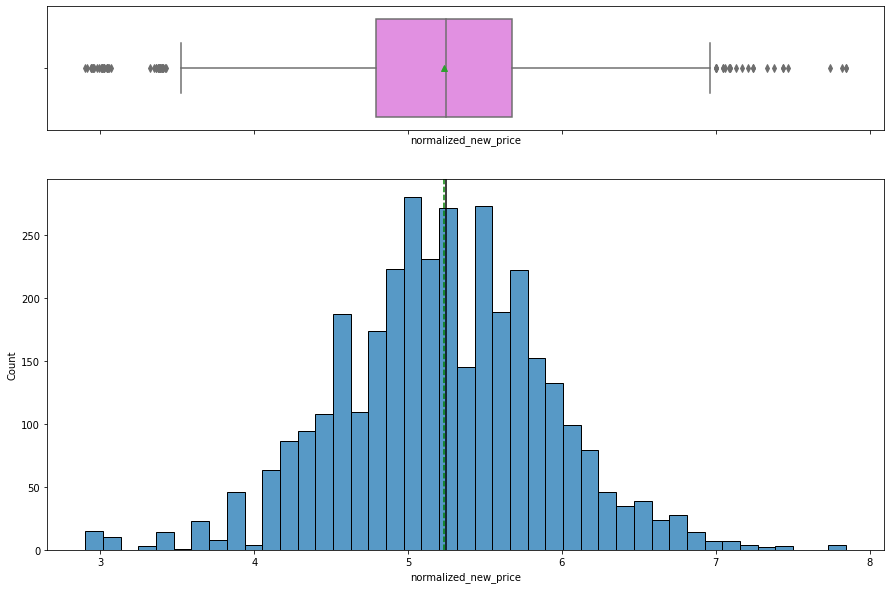

In [ ]:
histogram_boxplot(df,'normalized_new_price')

**Observations:**

1) The distribution is normal with a thin tail on both ends.

2) The average normalized new price is around 5.2 Euros

**Observations on Operating System**

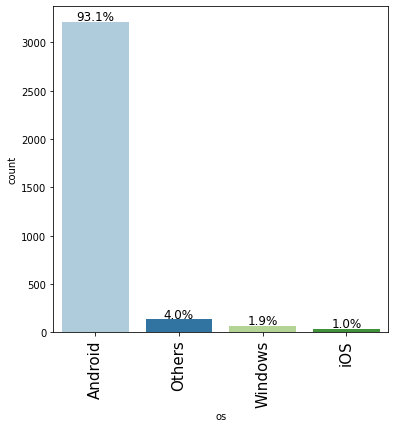

In [ ]:
labeled_barplot(df,'os',perc=True)

**Observations:**

1) The majority of the used/refurbished devices are using the Android OS being 93.1%.

2) The used/refurbished devices using IOS OS is the lease which is only 1%.

**Observations on 4G**

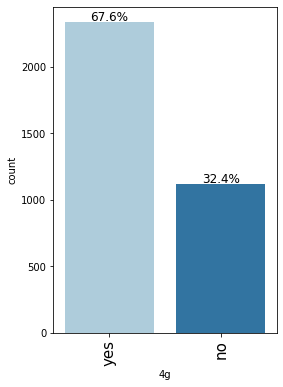

In [ ]:
labeled_barplot(df,'4g',perc=True)

**Observations:**
 Around 67.6% of the used/refurbished devices have 4G network option.

**Observations on 5G**

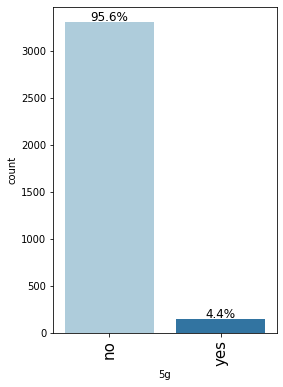

In [ ]:
labeled_barplot(df,'5g',perc=True)

**Observations:**
Only 4.4% of theused/refurbished devices offer 5G network connectivity option.

**Observations on Brand Name**

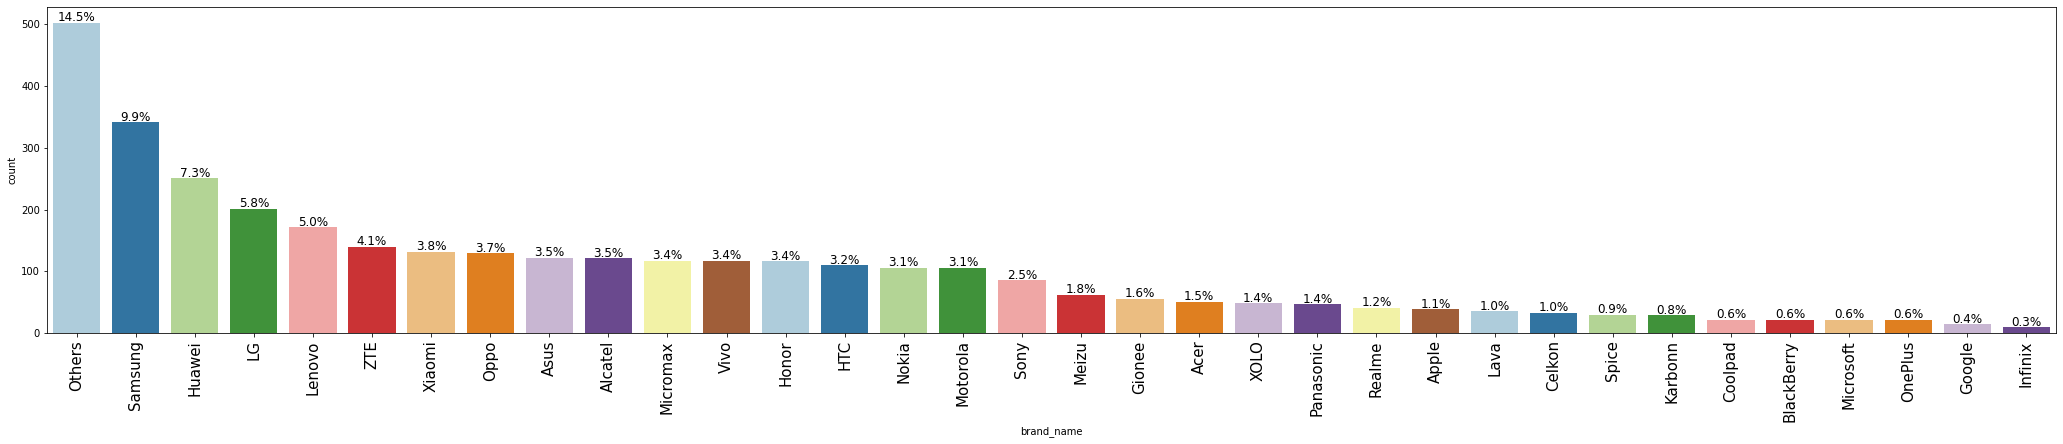

In [ ]:
labeled_barplot(df,'brand_name',perc=True)

**Observations:**

1) Around 14.5% of the devices are of brands unknown.

2) While the second most common brand found the used/refurbished devices is of Samsung brand contributing to 9.9% followed by Huawei contributing to 7.3%.

3) The least common brand found in the used/refurbished devices is Infinix which is only 0.3% & is closely followed by Google which is only 0.4%

**Observation on Year of release of  phone**

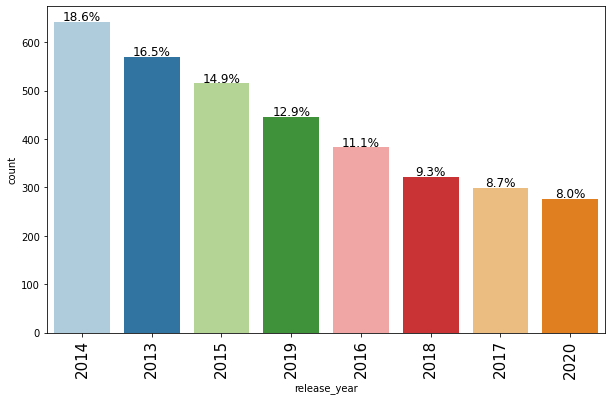

In [ ]:
labeled_barplot(df,'release_year',perc=True)

**Observations:**

1) 18.6% of the used/refurbished devices are those released in the Y2014 which is the maximum & is closely followed by those release in the Y2013 which is 16.5%

2) Only 8% of the used/refurbished devices are those released in the Y2020.


# **Multivariate Analysis**

In [ ]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

In [ ]:
# Removing release_year column as it is a list of years
num_cols.remove('release_year')


In [ ]:
#Displaying the final numerical column list
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

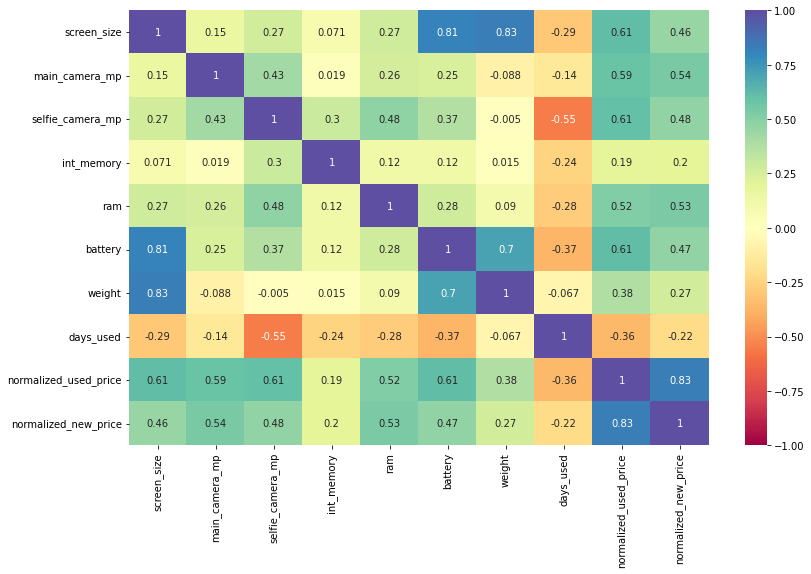

In [ ]:
# Creating a correlation table of the numerical columns
plt.figure(figsize=(13,8))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

**Observations:**

1) There is a high positive corelation seen between battery & screen size as well as between weight & screen size of the device.

2) Ther is also a positive corelation of 0.73 seen between battery & weight of the device.

3) There is a negative correlation of -0.55 between selfie camera & days used of the device.

# **Bivariate Analysis**

**Relation between RAM & Brand Name**

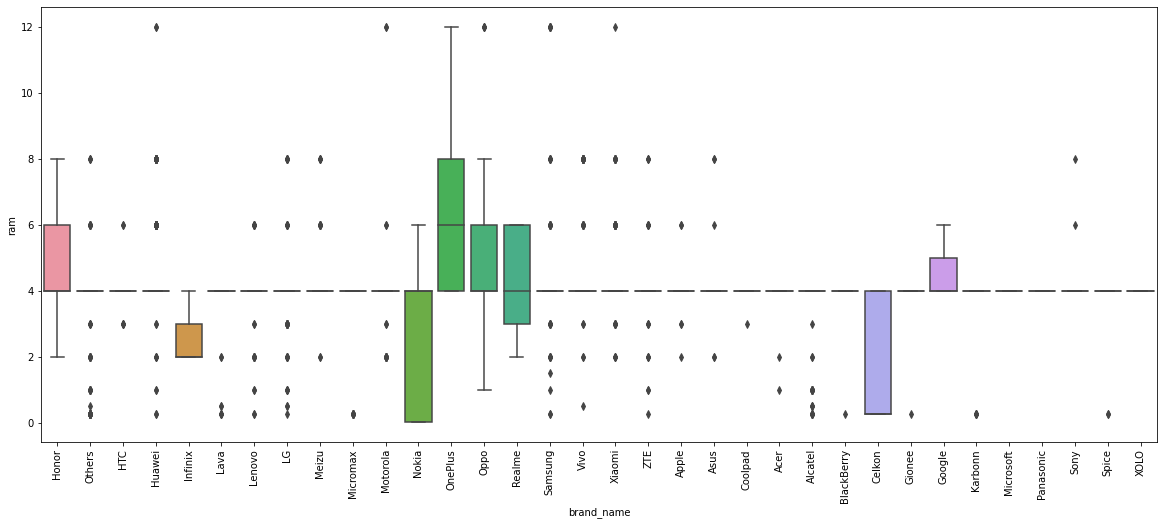

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

**Observations:**

1) All devices of all brands offer 4GB RAM.

2) The brand One Plus offers RAM with minimum 4GB while the maximum is 12GB

3) Brand Honor offers devices with RAM between minimum 2GB & maximum 8GB


**Relation between 4G & Normalized Used Price**

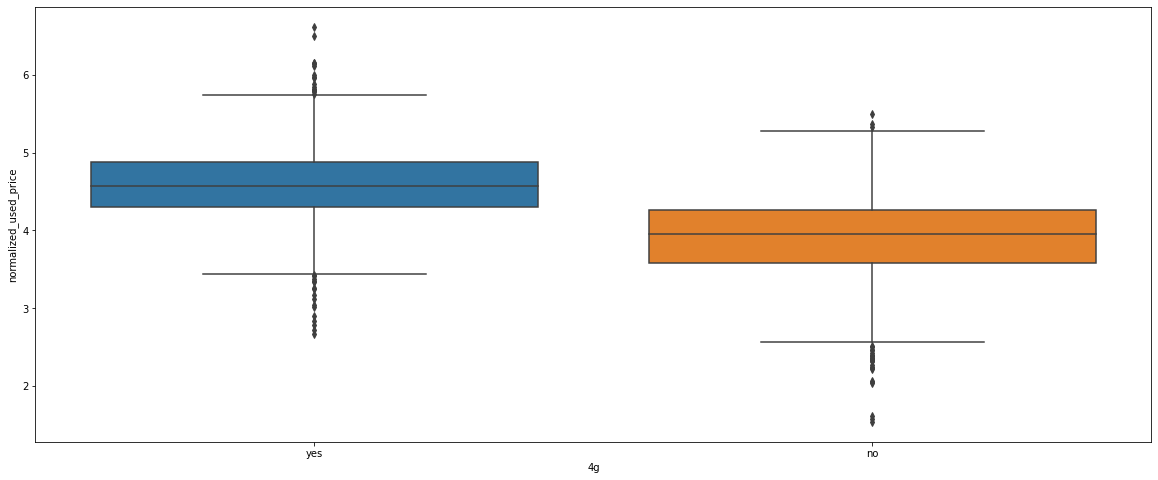

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='4g',y='normalized_used_price')
plt.show()

**Observation:**

1) 50% of the devices with 4G network connectivity have a normalized used price below 4.5 Euros.

2) 75% of the devices which donot offer 4G connectivity have a normalized used price below 4.2 Euros.

3) Devices which offer 4G connection have a higher normalized used price than those which donot offer a 4G connection.


**Relation between Weight & Battery**

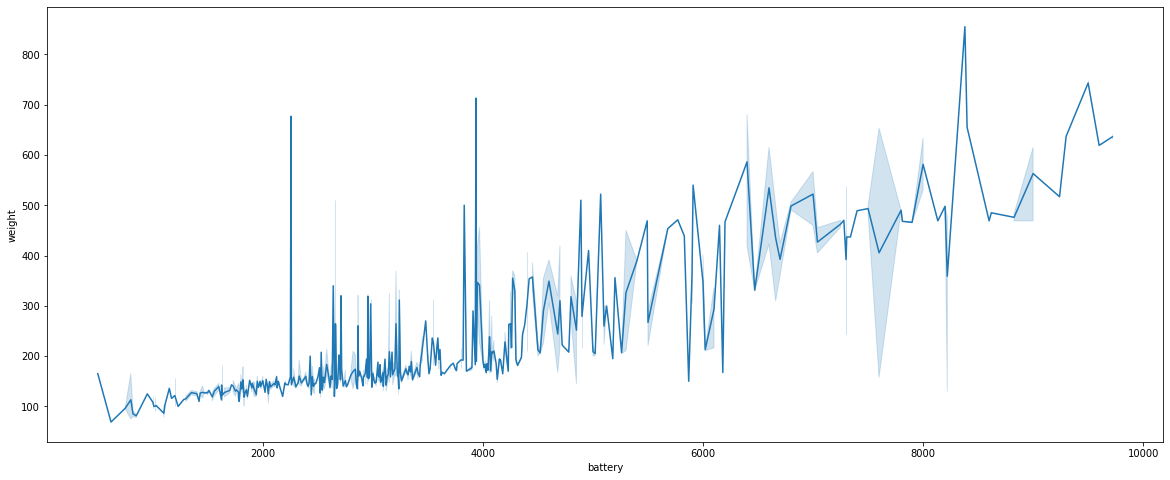

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='battery',y='weight')
plt.show()

**Observations**:
From the graph it can be seen that as the battery size increase the weight of the devices also increases.


**Understanding the relation of brands having battery size > 4500mAH**

In [ ]:
# Creating a dataframe with devices having battery size greater than 4500 mAH.
df_large_battery=df[df.battery>4500]
df_large_battery.shape

(341, 15)

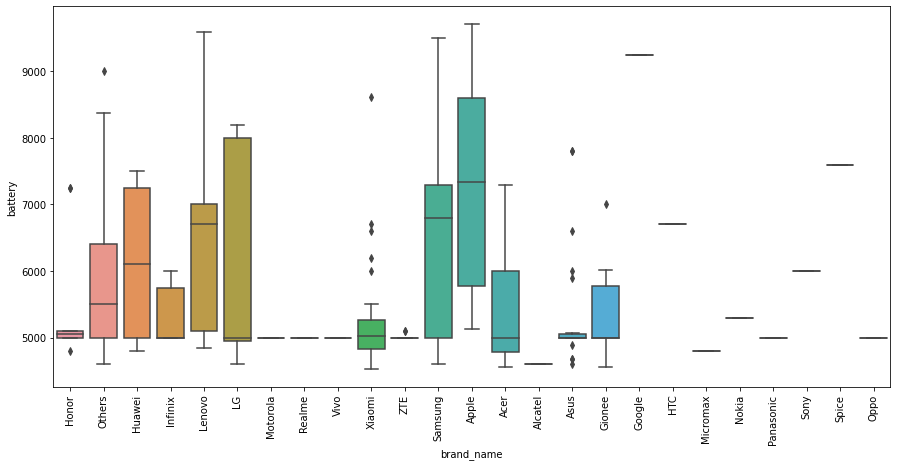

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df_large_battery,y='battery',x='brand_name')
plt.xticks(rotation=90)
plt.show()

**Observations:**

1) Apple brand offers the maximum range of battery size with the avergae being around 7200mAH

2)Some brands such as Motorola,Reliance,Vivo,ZTE,HTC, Micromax,Nokia,Google,Panasonic, Sony , Spice & Oppo donot offer a range in battery size.


**Relation between Brand Name & Main Camera greater than 16MP**

Shape of data frame (94, 15)


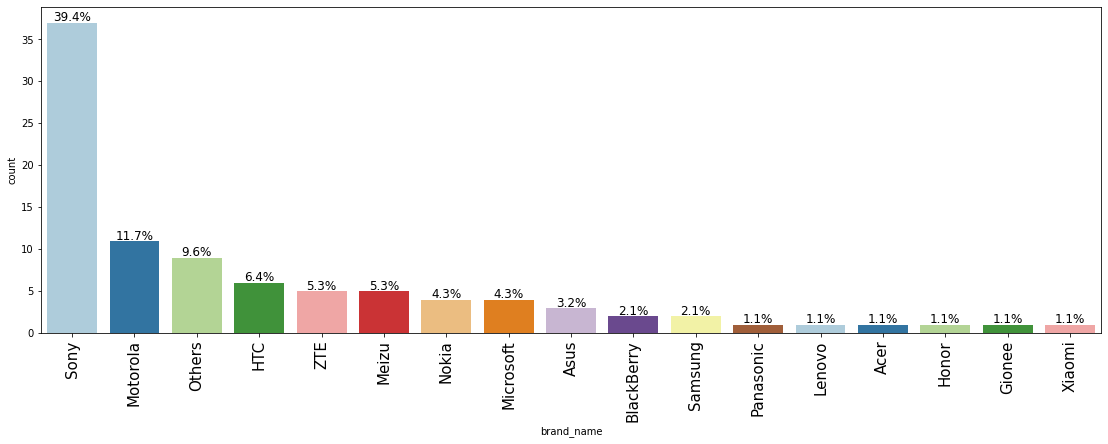

In [ ]:
# Creating a datafram with devices having main camera >16 MP
df_large_main_camera=df[df.main_camera_mp>16]
print("Shape of data frame",df_large_main_camera.shape)
labeled_barplot(df_large_main_camera,'brand_name',perc=True)

**Observations:**

1) Of the devices with main camera>16MP, sony contributes to 39.4% of the devices followed by Motorolla which is 11.7%.

2) The least contribution is by Xiamoi,Panasonic,Lenovo,Acer,Honor,Gionee which is 1.1%

**Realtion between Brand Name & Selfie camera > 8 MP**

Shape of data frame (222, 15)


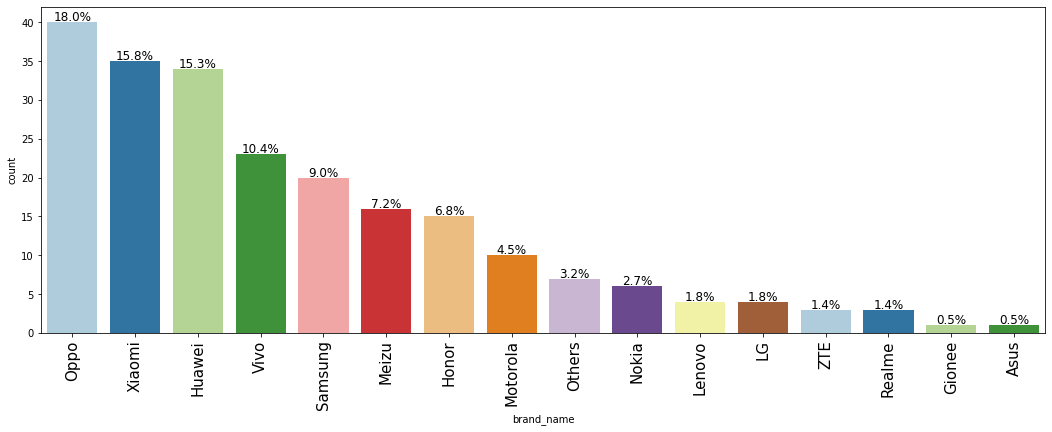

In [ ]:
#creating a dataframe with devices having selfie camera > 8MP
df_large_selfie_camera=df[df.selfie_camera_mp>16]
print("Shape of data frame",df_large_selfie_camera.shape)
labeled_barplot(df_large_selfie_camera,'brand_name',perc=True)

**Observation**

1) Of the brands offering devices with selfie camera > 8MP, the contribution of OPPO brand is maximum at 18% followed by Xiaomi at 15.8%.

2) The least contribution is by Gionee & Asus at 0.5%.

**Relation between Brand Name & Screen Size>13 cm**




Shape of data frame (1340, 15)


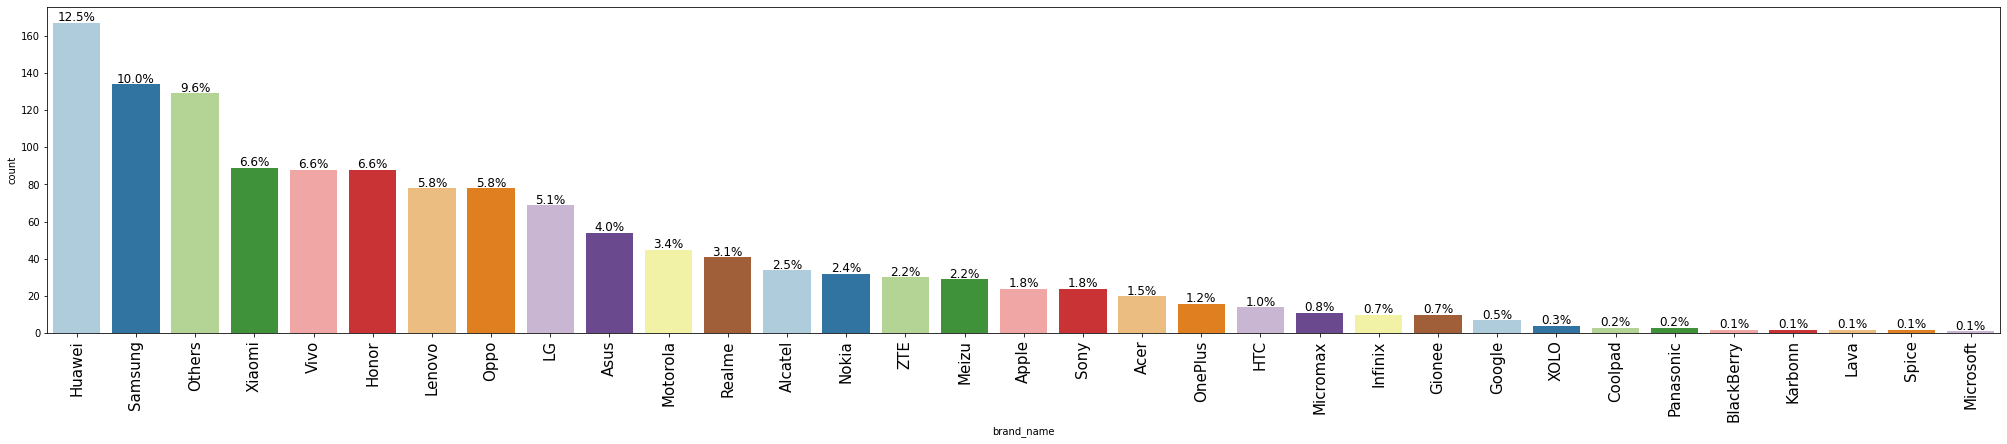

In [ ]:
#Creating a dataframe with devices having screen size >13cm
df_large_screen_size=df[df.screen_size>13]
print("Shape of data frame",df_large_screen_size.shape)
labeled_barplot(df_large_screen_size,'brand_name',perc=True)

**Observation:**

1) Of the brands offering devices with screen size > 13cm, the constribution by Huawei is maximum at 12.5% followed by Samsung at 10%.

2) The least contribution is by Acer ar 1.5%.

**Relation between Price & Years**

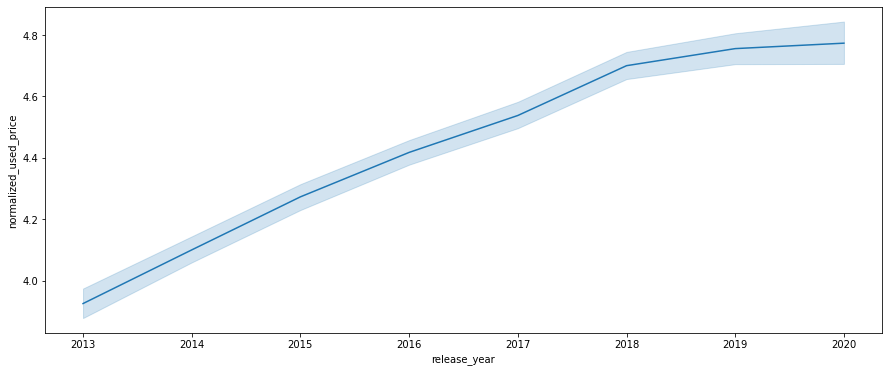

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df,y='normalized_used_price',x='release_year')
plt.show()

**Observation:**

Devices which were released the latest have a higher normalized used price while devices that were released earlier have a lower normalized used price.

**Relation between normalized used price and days used**

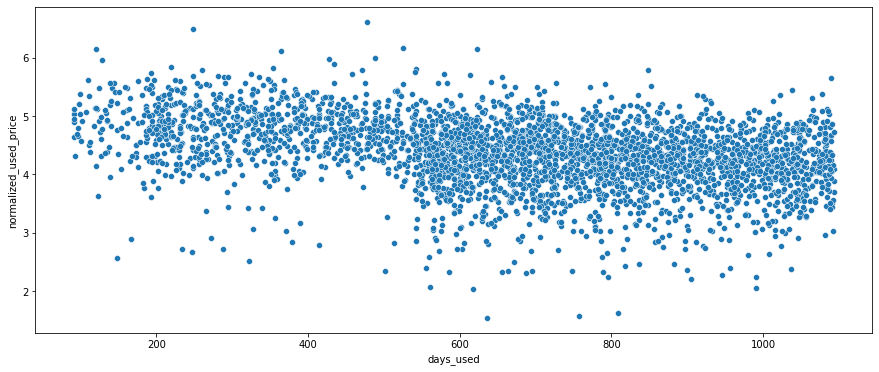

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,y='normalized_used_price',x='days_used')
plt.show()

**Observation:**
No pattern can be seen between the no. of days a device is used to the normalized used price.

**Relation between 5G & Normalized used price**

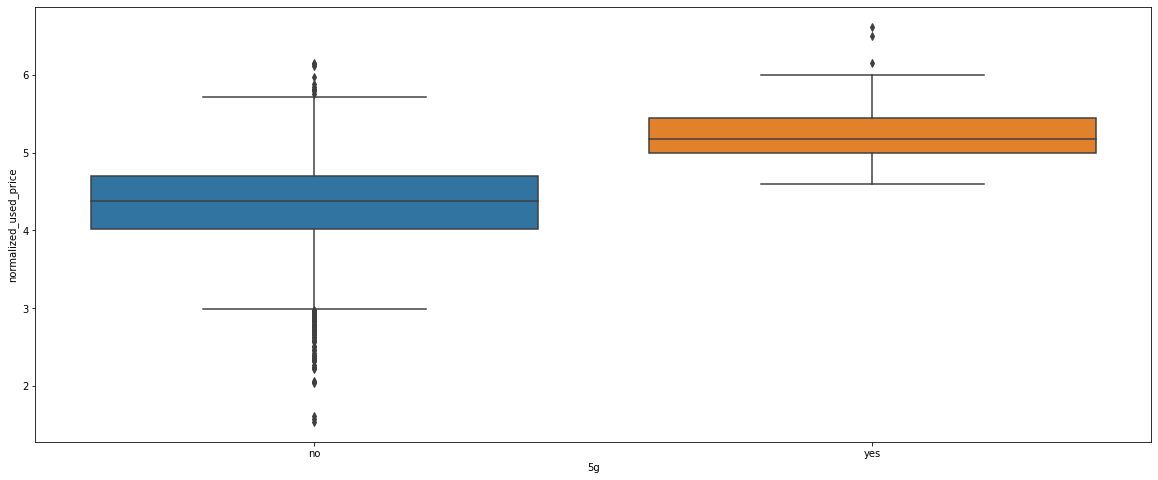

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='5g',y='normalized_used_price')
plt.show()

**Observations:**

1)50% of the devices which donot offer 5G connectivity have a normalized used price below 4.5 Euros.

2)50% of the devices which offer 5G connectivity have a normalized used price below 5.2 Euros

3) Devices with 5G connectivity have a higher normalized used price than those which donot offer 5G connectivity.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing Value Treatment**

In [ ]:
#Creating a copy of the dataset
df1=data.copy()
#Checking for the presence of missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

With 6 columns having missing values, we Will be imputing the missing data in these columns with median based on brand_name & release_year.

In [ ]:
cols_missing=['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']
for col in cols_missing:
  df1[col]=df1[col].fillna(value=df1.groupby(['release_year','brand_name'])[col].transform('median'))
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Still 4 columns have missing values which will be imputed with median based on brand_name.

In [ ]:
cols_missing=['main_camera_mp','selfie_camera_mp','battery','weight']
for col in cols_missing:
  df1[col]=df1[col].fillna(value=df1.groupby(['brand_name'])[col].transform('median'))
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

The missing values of main_camera_mp column will be imputed with the median of the main_camera_mp column.

In [ ]:
df1['main_camera_mp']=df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing values have been treated.

**Featured Engineering**

Since the data was collected in the Y2021, we will be considering this
year for computing the years since release column and add it the dataset.

We will drop the release year column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Outlier Check**

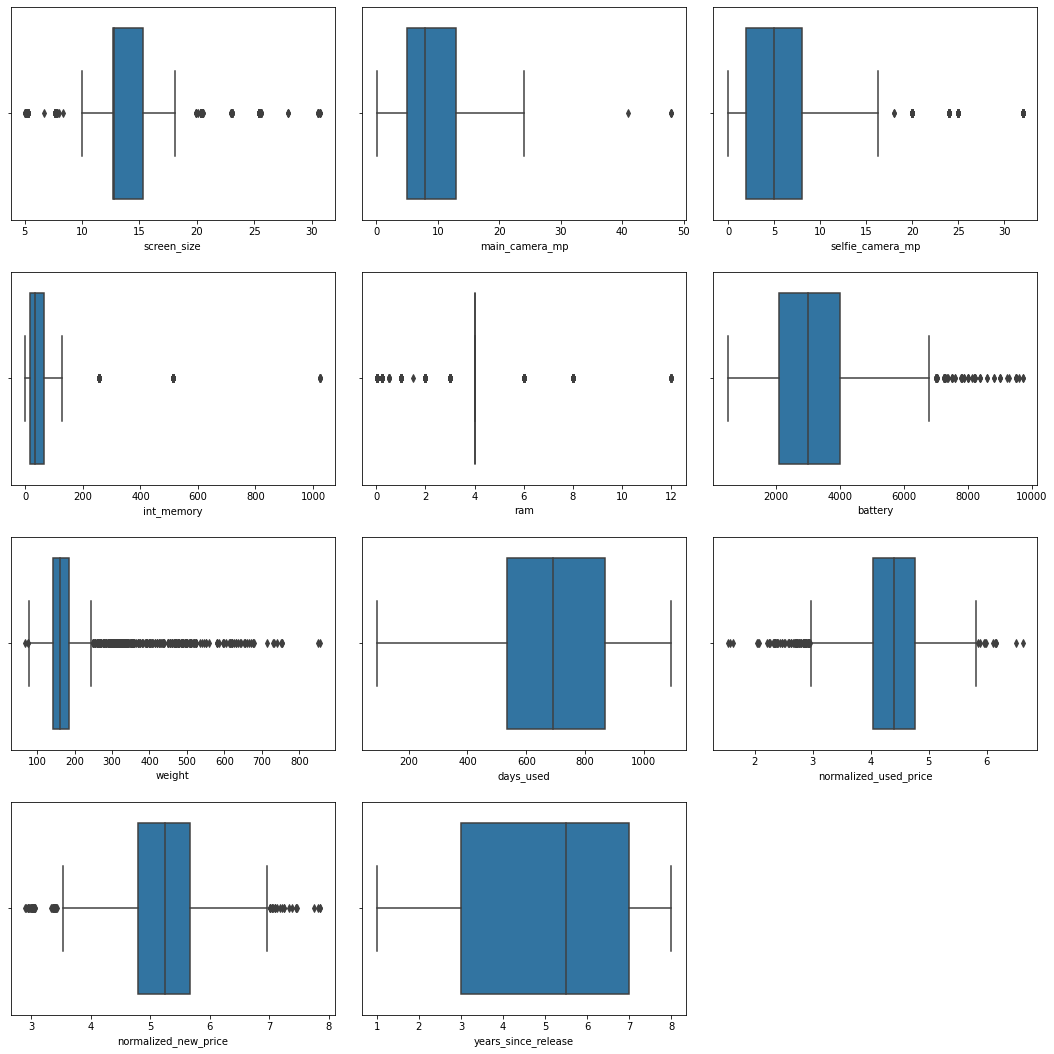

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, var in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=var)
    plt.tight_layout(pad=2)

plt.show()

There are quite a few outliers in the dataset but will not be treating them as they are proper values.

**Data Preparation for Modeling**



*   Here we are wanting to predict the normalized used price of the device thus making it the dependent variable.

*   We will be creating dummy variables for the categorical data

*   We will be splitting the data into train & test.

*   We will be building a linear regression model using train data & check its performance.









In [ ]:
#Defining X & y vaiables
X=df1.drop(['normalized_used_price'],axis=1)
y=df1.normalized_used_price
print('Independent Variables:\n',X.head())
print('/nDependent Vairable:\n',y.head())

Independent Variables:
   brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                  

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#creating dummy vairables
X=pd.get_dummies(X,columns=X.select_dtypes(include=['object','category']).columns.tolist(),drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Splittig the data in 70:30 ratio for Train & Test data respectively
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print("No. of rows in Test data:",x_test.shape[0])
print("No. of rows in Training data:",x_train.shape[0])

No. of rows in Test data: 1037
No. of rows in Training data: 2417


## EDA

- It is a good idea to explore the data once again after manipulating it.

**Obsevation on Main camera after adding missing value**

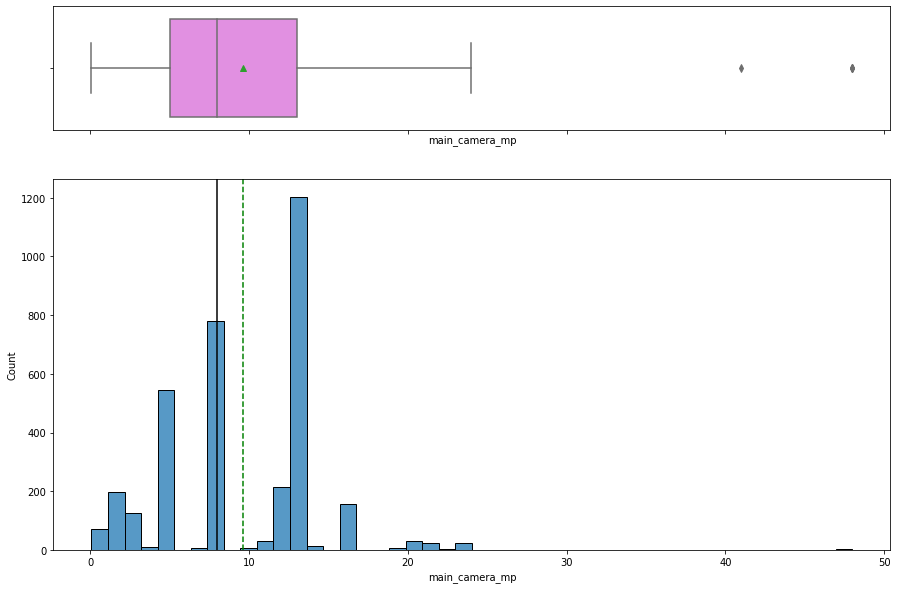

In [ ]:
histogram_boxplot(df1,'main_camera_mp')

**Observation:**

1) The data is right skewed & is similar to the graph before imputing the missing value.



**Observation on Selfie Camera**

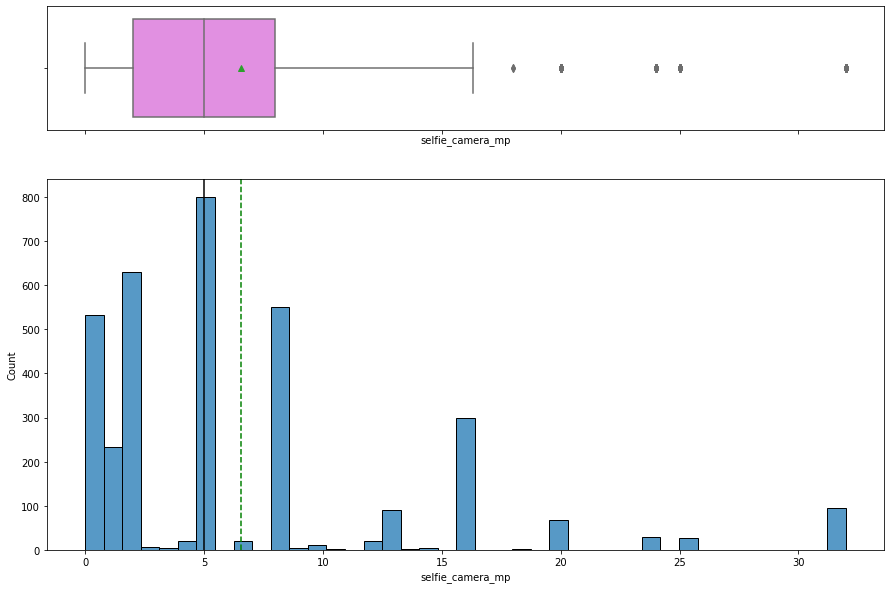

In [ ]:
histogram_boxplot(df1,'selfie_camera_mp')

**Observations:**

1) The data is right skewed & is similar to the graph before imputing the missing value.

**Observation on Internal Memory**

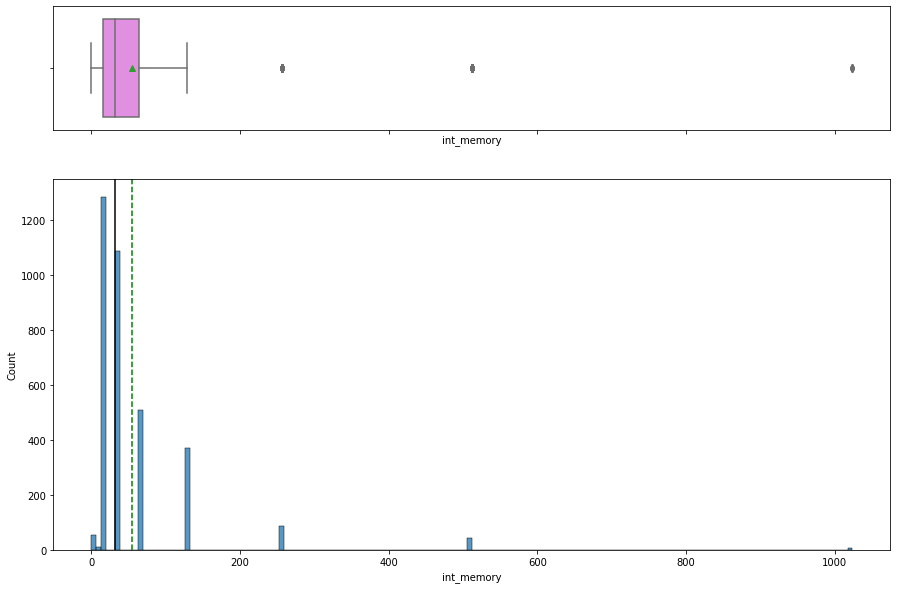

In [ ]:
histogram_boxplot(df1,'int_memory')

**Observations:**

1)1) The data is right skewed with outlies & is similar to the graph before imputing the missing value.

**Observation on RAM**

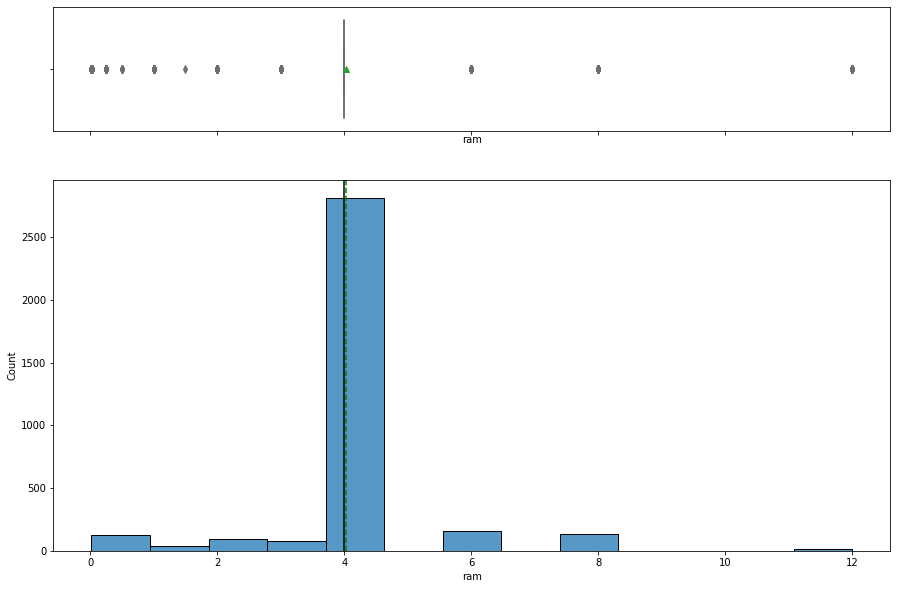

In [ ]:
histogram_boxplot(df1,'ram')

**Observations:**
1) Most of the devices have a RAM of 4GB.

2) It is similar to the graph before imputing the missing value.

**Observation on Battery**

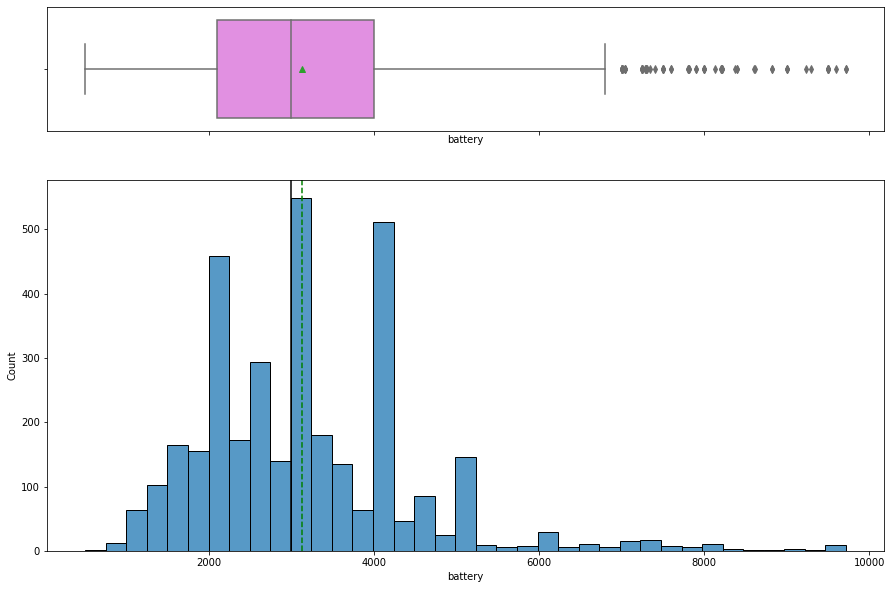

In [ ]:
histogram_boxplot(df1,'battery')

**Observations:**

1) The data is right skewed & is similar to the graph before imputing the missing value.

**Observation on Weight**

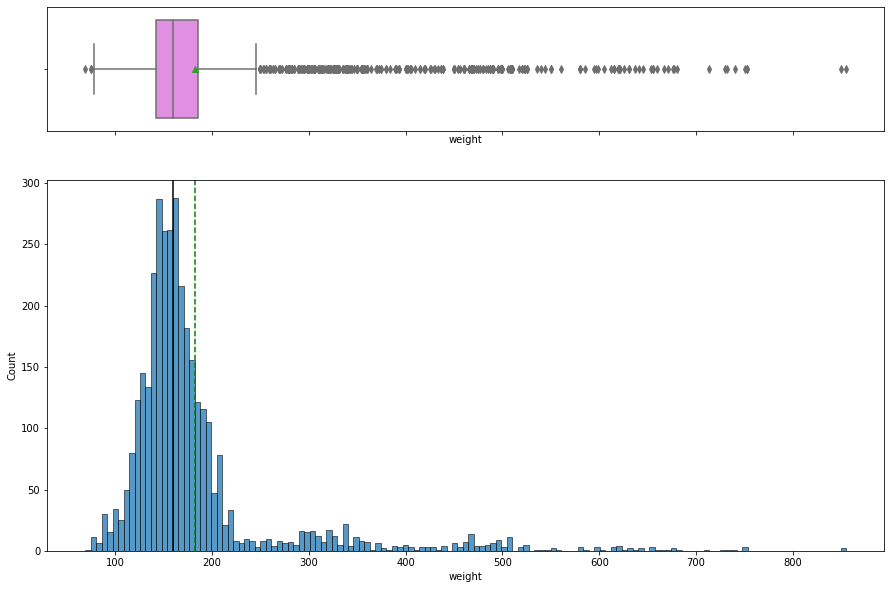

In [ ]:
histogram_boxplot(df1,'weight')

**Observation:**

1) It is similar to the graph before imputing the missing value.

## Model Building - Linear Regression

In [ ]:
#Building a linear regression model
olsmodel=sm.OLS(y_train,x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           04:09:46   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpretation of Results**

1) **Adjusted. R-squared:** It reflects the fit of the model.

The value for adj. R-squared is **0.842**, which is good.This implies 84.2% of variance in the normalized used price is explained.

2)** const coefficient**: It is the Y-intercept.

If all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.

Here, the value for const coefficient is **1.3156.**

3) **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
Here, the coefficient of *screen_size* is **0.0244.**

## Model Performance Check

We are checking the model performance based on the following

1) MAPE

2) R squared

3) RMSE

4) Adjusted R Squared

5) MAE

In [ ]:
#function to compute adjusted R-squared
def adj_r2_score(predictors,targets,predictions):
  r2=r2_score(targets,predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance:\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance:\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

1) The training  R2  is 0.844, so the model is not underfitting

2) The train and test RMSE and MAE are comparable, so the model is not overfitting.

3) MAE suggests that the model can predict normalized used price within a mean error of 0.185 on the test data.

4) MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following assumptions of linear regression:

1) Linearity of variables

2) Normality of residuals

3) Independency of residuals

3) Homoscedasticity

4) No Multicollinearity

**Testing for Multicollinearity**

We will use the Variance Inflation Factor to test for multicollinearity.

* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [ ]:
# Creating function to treat multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size','weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
col_to_drop ='screen_size'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


On dropping the column screen_size, other than the dummy & constant variables, the VIF for all other variables is less than 5, thus multicollinarity has been treated.

We will build a model to test its effect.

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           04:09:48   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**:

* We can see that adj. R-squared has dropped from 0.845 to 0.842, which shows that the dropped columns did not have much effect on the model.

* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

**p-value Treatment:**

We see that some of the p-values are very high & it needs to be treated.

For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

$H_o$ : Independent feature is not significant ($\beta_i = 0$)

$H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

(P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

A p-value of less than 0.05 is considered to be statistically significant.

We will do the following:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
* Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           04:09:48   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance:\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance:\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**

1) Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with

2) Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance in the normalised used price.

3) The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.838.This shows that the variables we dropped were not affecting the model.

4) RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

**Testing for Linearity &  Independence**

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


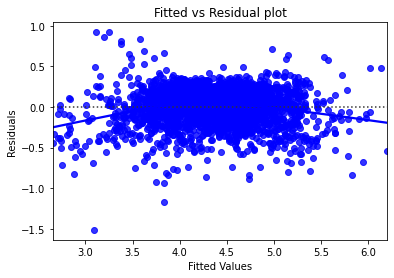

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**

1) The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

2) There is no pattern seen in the above plot.Hence the assumption of linearity & independence is satisfied.

**Testing for Normality**

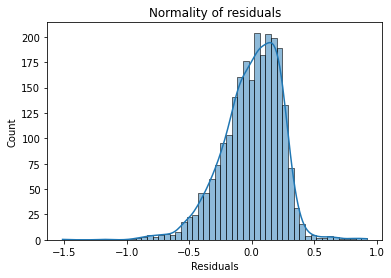

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**:
The histograph is almost normally distributed.

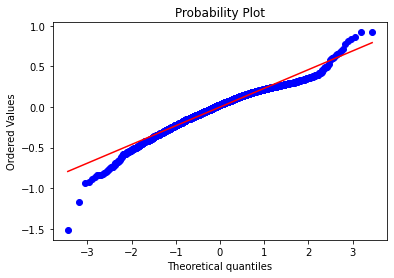

In [ ]:
# Creating the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:**
The residuals more or less follow a straight line except for the tails.

In [ ]:
#Checking Shapiro's test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

**Observations**:

1) Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

2) Strictly speaking, the residuals are not normal.

3) However, as an approximation, we can accept this distribution as close to being normal.

4) So, the assumption is satisfied.


**Testing for Homoscedasticity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

**Observation**:
Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

**Predictions on Test data**

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


**Observations**:
 The actual & predicated values are comparable & the model has returned good prediction results.

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                           04:09:50   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance:\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Interpretation of Results:**

1) The model is able to explain ~84% of the variation in the data.

2) The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

3)  The MAPE on the test set suggests we can predict within 4.6% of the normalized used price.

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1) The model is able to explain 84% of variation in the data and within 4.6% if the normalized used price on the test data which is good. This indicates the model is good for pediction & inference purposes.

2)If the main_camera_mp of a device increases by one unit, then its normalized used price increases by 0.0210 units provided all other variables are held constant.

3)If the selfie_camera_mp of a device increases by one unit, then its normalized used price increases by 0.0138 units provided all other variables are held constant.

4)If the RAM of a device increases by one unit, then its normalized used price increases by 0.0207 units provided all other variables are held constant.

5)If the weight of a device increases by one unit, then its normalized used price increases by 0.017 units provided all other variables are held constant.

6)If the normalized new price of a device increases by one unit, then its normalized used price increases by 0.4415 units provided all other variables are held constant.

7)If the years since release of a device increases by one unit, then its normalized used price decreases by 0.0292 units provided all other variables are held constant.

8) As the normalized used price reduces with the increase in years since release, ReCell corpoation should ensure to sell off the older devices faster by promoting them through marketing.

9)As the normalized used price increase with the increase in presence of 4G connectivity in devices, ReCell corportation can add more devices with 4G than 5G.

10) ReCell can also consider adding other devices such as used/refurbished Laptops, Desktops for sale.

11)Samsung Brand seems to be the most prefered device & hence more devices of these brands can be added.

___